In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, LSTM,
    Dense, Dropout, Input, Flatten
)
from tensorflow.keras.models import Sequential


In [2]:
def runcode(data, look_back, epochs, batch_size):
    df = data.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    prices = df['Close/Last'].values.reshape(-1, 1)
    
    scaler = StandardScaler()
    scaled = scaler.fit_transform(prices)
    
    n = len(scaled)
    i1 = int(n * 0.70)
    i2 = int(n * 0.85)
    
    train_scaled = scaled[:i1]
    val_scaled   = scaled[i1 - look_back : i2]
    test_scaled  = scaled[i2 - look_back :]

    def make_seqs(arr):
        X, y = [], []
        for i in range(look_back, len(arr)):
            X.append(arr[i - look_back : i, 0])
            y.append(arr[i, 0])
        return np.array(X), np.array(y)

    X_train, y_train = make_seqs(train_scaled)
    X_val,   y_val   = make_seqs(val_scaled)
    X_test,  y_test  = make_seqs(test_scaled)
    
    X_train = X_train.reshape(-1, look_back, 1)
    X_val   = X_val.reshape(-1,   look_back, 1)
    X_test  = X_test.reshape(-1,  look_back, 1)
    
    model = keras.models.Sequential([
        Input((look_back,1)),
        Conv1D(32,3,activation='relu',padding='same'),
        MaxPooling1D(2),
        Conv1D(64,3,activation='relu',padding='same'),
        MaxPooling1D(2),
        LSTM(64),
        Dense(128,activation='relu'),
        Dropout(0.9),
        Dense(1)
    ])
    model.compile(optimizer = 'adam', loss = 'mae',metrics = [keras.metrics.RootMeanSquaredError()])
    
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=2
    )
    
    preds = model.predict(X_test)
    preds = scaler.inverse_transform(preds)
    
    train_df = df.iloc[:i2] 
    test_df  = df.iloc[i2:].copy()
    test_df['Predictions'] = preds
    
    plt.figure(figsize=(12,8))
    plt.plot(df['Date'], df['Close/Last'], color='Red', alpha=0.4, label='Full History')
    plt.plot(test_df['Date'], test_df['Close/Last'], label='Test (Actual)')
    plt.plot(test_df['Date'], test_df['Predictions'], label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title("Stock Price Prediction")
    plt.legend()
    plt.show()


Epoch 1/20
54/54 - 5s - 94ms/step - loss: 0.4261 - root_mean_squared_error: 0.5610 - val_loss: 0.1432 - val_root_mean_squared_error: 0.1855
Epoch 2/20
54/54 - 1s - 21ms/step - loss: 0.3227 - root_mean_squared_error: 0.4315 - val_loss: 0.1438 - val_root_mean_squared_error: 0.1853
Epoch 3/20
54/54 - 1s - 17ms/step - loss: 0.3149 - root_mean_squared_error: 0.4178 - val_loss: 0.1358 - val_root_mean_squared_error: 0.1730
Epoch 4/20
54/54 - 1s - 21ms/step - loss: 0.3037 - root_mean_squared_error: 0.4058 - val_loss: 0.1323 - val_root_mean_squared_error: 0.1741
Epoch 5/20
54/54 - 1s - 15ms/step - loss: 0.2964 - root_mean_squared_error: 0.4033 - val_loss: 0.1274 - val_root_mean_squared_error: 0.1677
Epoch 6/20
54/54 - 1s - 15ms/step - loss: 0.2918 - root_mean_squared_error: 0.3973 - val_loss: 0.1340 - val_root_mean_squared_error: 0.1810
Epoch 7/20
54/54 - 1s - 17ms/step - loss: 0.2862 - root_mean_squared_error: 0.3913 - val_loss: 0.1273 - val_root_mean_squared_error: 0.1732
Epoch 8/20
54/54 - 1

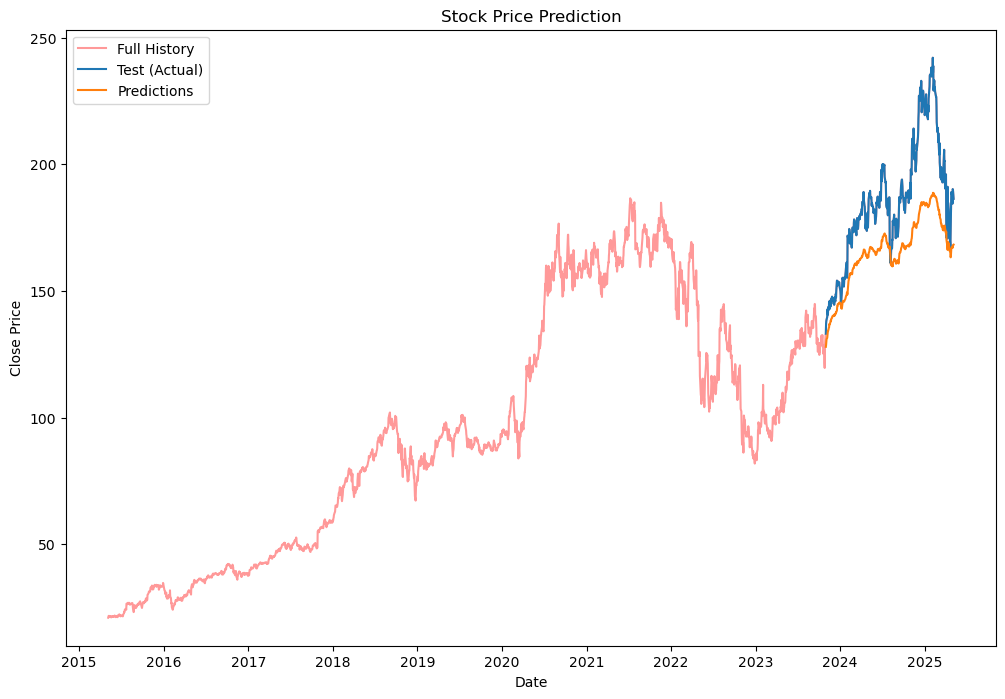

In [3]:
df = pd.read_csv("AMZN_Stock_Full.csv")
data = df.iloc[::-1].reset_index(drop=True)
for col in ["Close/Last", "Open", "High", "Low"]:
    if data[col].dtype == "object":
        data[col] = (data[col].str.replace(r"[\$,]", "", regex=True).astype(float))
runcode(data, 60, 20, 32)

Epoch 1/100
42/42 - 4s - 104ms/step - loss: 0.4721 - root_mean_squared_error: 0.6068 - val_loss: 0.1274 - val_root_mean_squared_error: 0.1652
Epoch 2/100
42/42 - 1s - 12ms/step - loss: 0.3360 - root_mean_squared_error: 0.4406 - val_loss: 0.1301 - val_root_mean_squared_error: 0.1777
Epoch 3/100
42/42 - 1s - 12ms/step - loss: 0.3238 - root_mean_squared_error: 0.4336 - val_loss: 0.1274 - val_root_mean_squared_error: 0.1668
Epoch 4/100
42/42 - 1s - 14ms/step - loss: 0.3152 - root_mean_squared_error: 0.4214 - val_loss: 0.1343 - val_root_mean_squared_error: 0.1674
Epoch 5/100
42/42 - 1s - 12ms/step - loss: 0.3127 - root_mean_squared_error: 0.4230 - val_loss: 0.1238 - val_root_mean_squared_error: 0.1597
Epoch 6/100
42/42 - 0s - 12ms/step - loss: 0.3020 - root_mean_squared_error: 0.4104 - val_loss: 0.1200 - val_root_mean_squared_error: 0.1615
Epoch 7/100
42/42 - 1s - 13ms/step - loss: 0.3014 - root_mean_squared_error: 0.4037 - val_loss: 0.1186 - val_root_mean_squared_error: 0.1583
Epoch 8/100


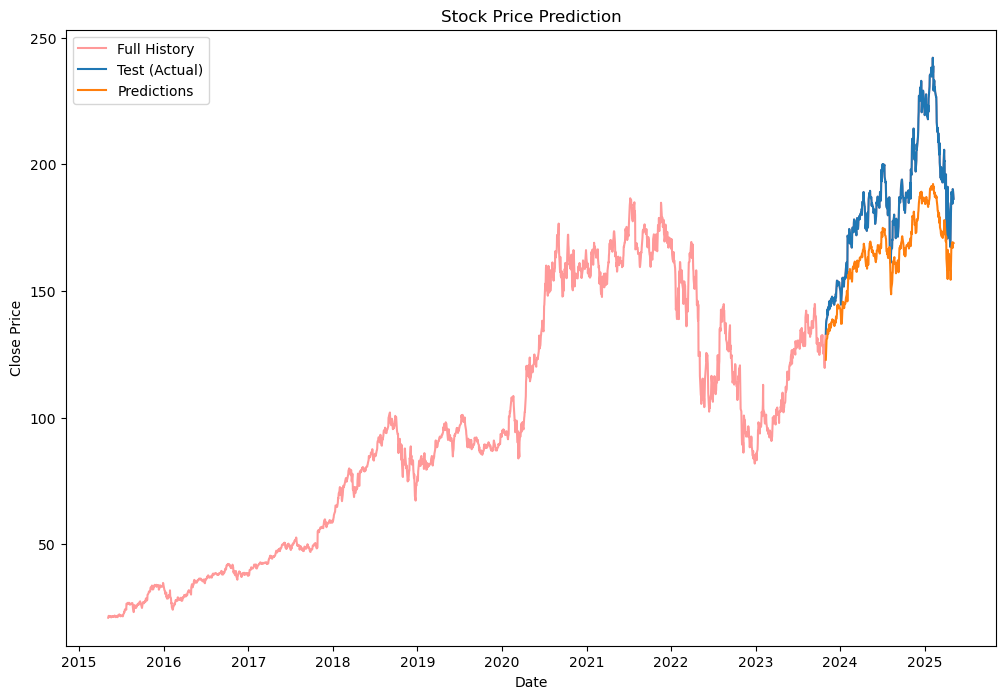

In [4]:
df = pd.read_csv("AMZN_Stock_Full.csv")
data = df.iloc[::-1].reset_index(drop=True)
for col in ["Close/Last", "Open", "High", "Low"]:
    if data[col].dtype == "object":
        data[col] = (data[col].str.replace(r"[\$,]", "", regex=True).astype(float))
runcode(data, 30, 100, 42)